# DATA SCIENCE AND BUSINESS ANALYTICS

## GRIP - THE SPARKS FOUNDATION #GRIP_SEPT_2021

# TASK 4 :- Exploratory Data Analysis - Terrorism

### Author :- Aniket Chaware

## Problem Statement

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights you can derive by EDA?

Dataset :- https://bit.ly/2TK5Xn5

## 1. Import Libraries

In [1]:
# Filtering out the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## 2. Reading the Dataset

In [3]:
#Read the globalterrorismdb_0718dist csv file
terrorism = pd.read_csv("globalterrorismdb_0718dist.csv", encoding ='ISO-8859-1')

#First five event of the dataset
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#last five 

terrorism.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


### 2.1 Inspecting the Dataframe

In [5]:
# Checking the number of rows and columns in the dataframe

terrorism.shape

(181691, 135)

In [6]:
#Checking all the information of the column

terrorism.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Dtype  
---  ------              -----  
 0   eventid             int64  
 1   iyear               int64  
 2   imonth              int64  
 3   iday                int64  
 4   approxdate          object 
 5   extended            int64  
 6   resolution          object 
 7   country             int64  
 8   country_txt         object 
 9   region              int64  
 10  region_txt          object 
 11  provstate           object 
 12  city                object 
 13  latitude            float64
 14  longitude           float64
 15  specificity         float64
 16  vicinity            int64  
 17  location            object 
 18  summary             object 
 19  crit1               int64  
 20  crit2               int64  
 21  crit3               int64  
 22  doubtterr           float64
 23  alternative         float64
 24  alternative_txt     objec

In [7]:
#Check the summary for the numeric columns

terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## 2.2 Out of 153 we have sorted the important columns and kept it from the original data.

In [8]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 
                       'provstate':'Prov_state', 'region_txt':'Region', 'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                       'crit3':'Crit3', 'success':'Success', 'suicide':'Suicide', 'attacktype1_txt':'Attack_Type', 
                       'target1':'Target', 'nkill':'Killed', 'nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_Type', 'weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)

In [9]:
global_terror = terrorism[['Eventid', 'Year','Month','Day','Country','Prov_state','Region','City', 'Crit1', 'Crit2', 'Crit3', 'Success', 'Suicide',
                       'Attack_Type','Target', 'Killed', 'Wounded','Summary','Group','Target_Type','Weapon_Type','Motive']]

In [10]:
global_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Prov_state   181270 non-null  object 
 6   Region       181691 non-null  object 
 7   City         181257 non-null  object 
 8   Crit1        181691 non-null  int64  
 9   Crit2        181691 non-null  int64  
 10  Crit3        181691 non-null  int64  
 11  Success      181691 non-null  int64  
 12  Suicide      181691 non-null  int64  
 13  Attack_Type  181691 non-null  object 
 14  Target       181055 non-null  object 
 15  Killed       171378 non-null  float64
 16  Wounded      165380 non-null  float64
 17  Summary      115562 non-null  object 
 18  Group        181691 non-

In [11]:
# Checking the null values in data

global_terror.isnull().sum()

Eventid             0
Year                0
Month               0
Day                 0
Country             0
Prov_state        421
Region              0
City              434
Crit1               0
Crit2               0
Crit3               0
Success             0
Suicide             0
Attack_Type         0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Target_Type         0
Weapon_Type         0
Motive         131130
dtype: int64

In [12]:
#SOME INFO FIRST

print("Country with the most attacks:- ", global_terror['Country'].value_counts().index[0])

print("City with the most attacks:- ", global_terror['City'].value_counts().index[1]) #as first entry is 'unknown'

print("Region with the most attacks:- ", global_terror['Region'].value_counts().index[0])

print("Year with the most attacks:- ", global_terror['Year'].value_counts().index[0])

print("Month with the most attacks:- ", global_terror['Month'].value_counts().idxmax())

print("Group with the most attacks:- ", global_terror['Group'].value_counts().index[1])

print("Most Attack Types:- ", global_terror['Attack_Type'].value_counts().idxmax())

print('Maximum number of people were killed by a single terrorist attack are', global_terror['Killed'].max(),'people that took place in', global_terror.loc[global_terror['Killed'].idxmax()].Country)

Country with the most attacks:-  Iraq
City with the most attacks:-  Baghdad
Region with the most attacks:-  Middle East & North Africa
Year with the most attacks:-  2014
Month with the most attacks:-  5
Group with the most attacks:-  Taliban
Most Attack Types:-  Bombing/Explosion
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [13]:
global_terror['Year'].value_counts(dropna = False).sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

## 3. Data Analysis

### 3.1 Number of Terrorist Activities each Year

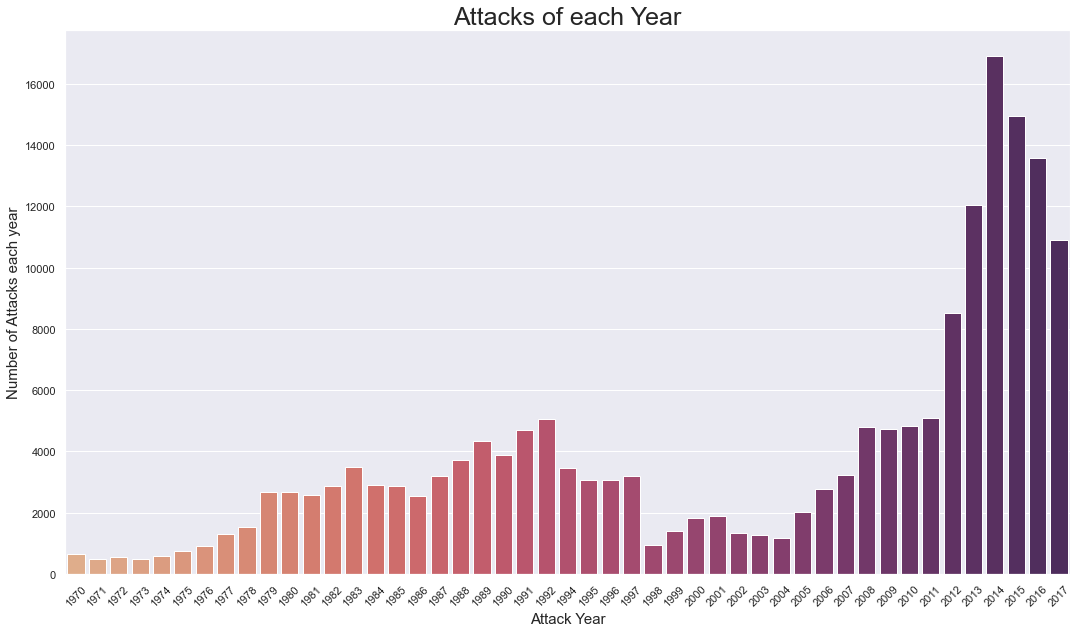

In [14]:
x_year = global_terror['Year'].unique()
y_count_years = global_terror['Year'].value_counts(dropna = False).sort_index()

#Bar Plot for Attacks of Years
plt.figure(figsize = (18,10))
sns.set(style="darkgrid")
sns.barplot(x = x_year, y = y_count_years, palette = 'flare')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year', fontsize=15)
plt.ylabel('Number of Attacks each year', fontsize=15)
plt.title('Attacks of each Year', fontsize=25)
plt.show()

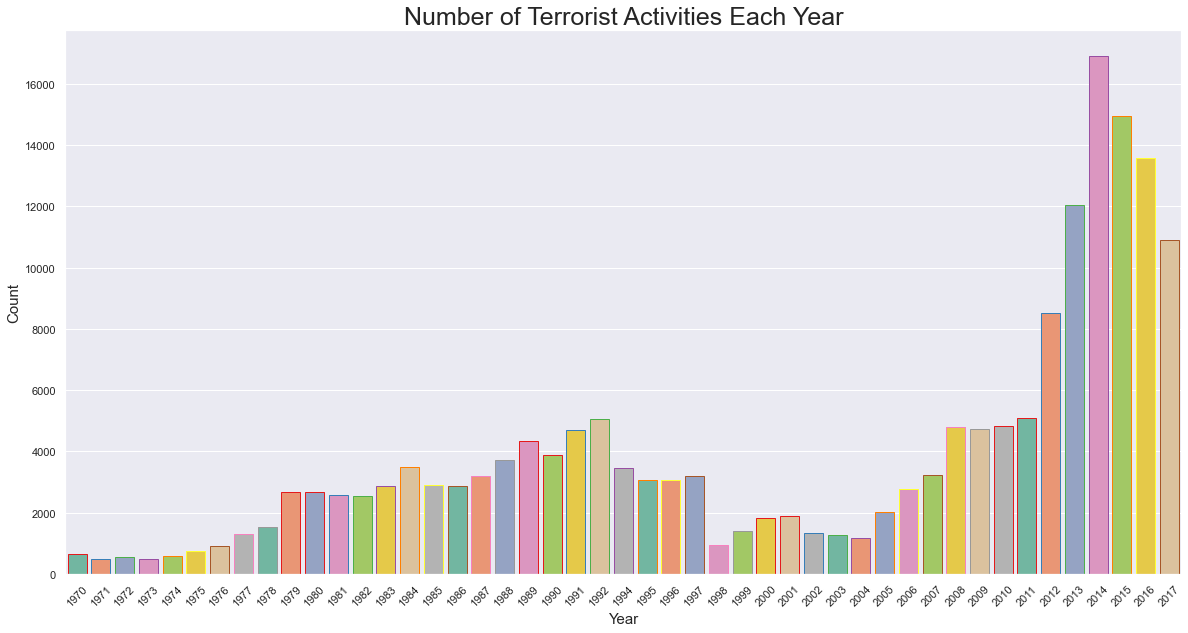

In [15]:
#Count Plot for Number of Terrorist Activities happening every year

plt.subplots(figsize=(20,10))
sns.set(style="darkgrid")
sns.countplot('Year', data = global_terror, palette='Set2', edgecolor=sns.color_palette("Set1", 10))
plt.xticks(rotation=45)
plt.title('Number of Terrorist Activities Each Year', fontsize=25)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

### 3.2 Terrorist Activities by Region in each Year by Area plot

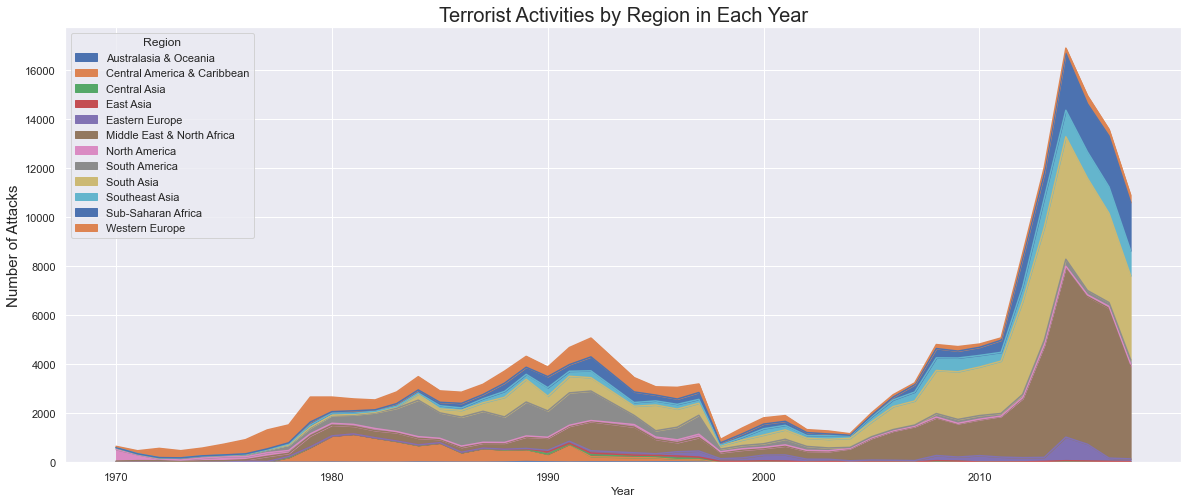

In [16]:
#Crosstab for Number of terrorist activities happening according to the region in each year

pd.crosstab(global_terror.Year, global_terror.Region).plot(kind='area',figsize=(20,8))
plt.title('Terrorist Activities by Region in Each Year', fontsize=20)
plt.ylabel('Number of Attacks', fontsize=15)
plt.show()

In [17]:
#Add column Damage (Number of Dead/Injured people) by adding Killed and Wounded

global_terror['Wounded'] = global_terror['Wounded'].fillna(0).astype(int)
global_terror['Killed'] = global_terror['Killed'].fillna(0).astype(int)
global_terror['Damage'] = global_terror['Killed'] + global_terror['Wounded']

#### Comparing the number of Terrorist Attacks and the number of Dead/Injured people from 1970 to 2017

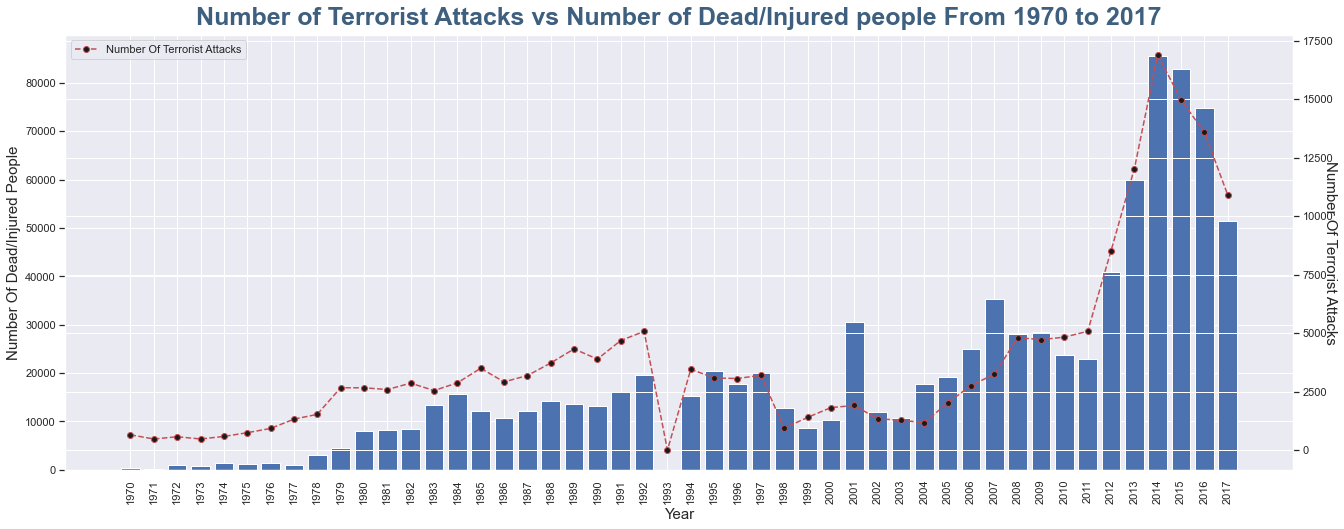

In [18]:
#Filter Data to choose Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017
people_damage = global_terror[["Year","Damage"]].groupby('Year').sum()
list_year =  global_terror["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (22,8))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values])

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', fontsize = 15)
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 25, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(global_terror[global_terror['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', fontsize = 15,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

Observation:

This graph show the number of global terrorist attacks and number of dead/injured people by year from 1970 to 2017. Overall, the number of attacks is increasing. The number of dead/injured people also increases respectively. The number of attack increased significantly from 2012 to 2015. The year 2015 is unlucky year with nearly 17000 reported terrorist attacks.

### 3.3 Top Countries affected by Terror Attack

In [19]:
global_terror.Country.value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

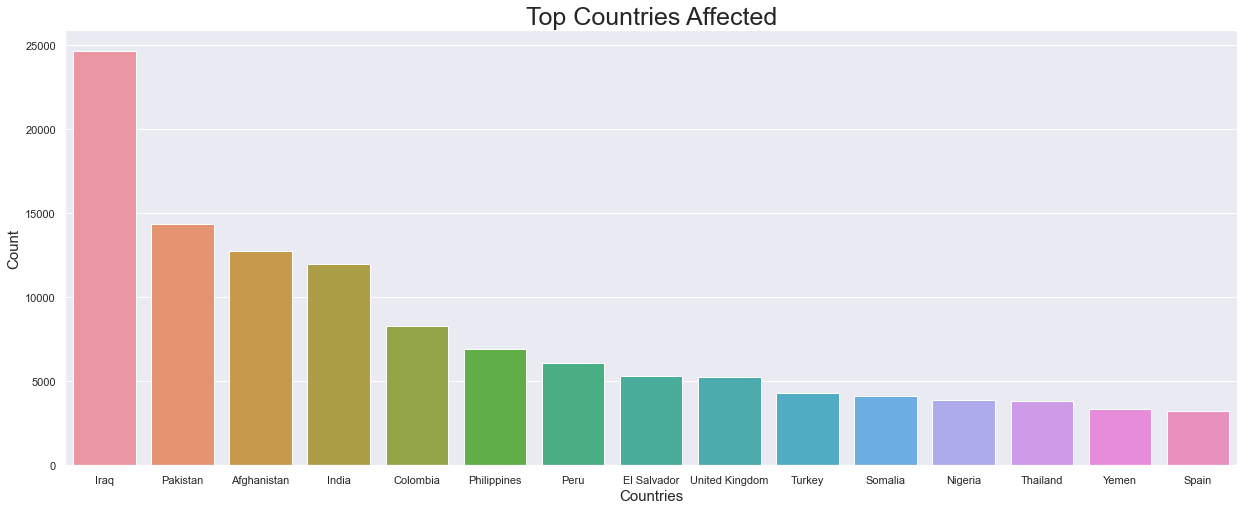

In [20]:
#bar plot for top countries affected

plt.subplots(figsize=(21,8))
sns.barplot(global_terror['Country'].value_counts()[:15].index, global_terror['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected' , fontsize=25)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation= 0)
plt.show()

Observation :

Before taking a look at the top 10 safest countries, we should take a look at top 10 most targerted countries and nationalities. Top 4 most targeted countries and nationalities are still Iraq, Pakistan, Afganistan and India. The situation have not been improved in the last 2 decadeds for these countries.

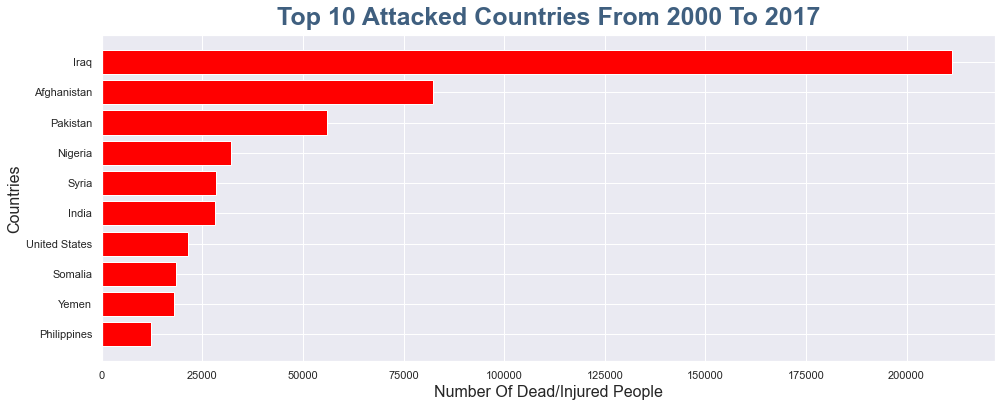

In [21]:

#Choose comlumn Country and Damage from data
country_damage = global_terror[global_terror['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
global_terror_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint bar chart 
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(global_terror_paint["Country"][::-1], global_terror_paint["Damage"][::-1], color = 'red')
plt.xticks(rotation=0)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 25, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

### 3.4 Identify the safest countries from 2000 to 2017 which has 0 dead/injured people caused by Terrorist Attacks

In [22]:
#Filter from dataframe country_damage

country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0
14,Belize,0
34,Cyprus,0
64,Iceland,0
105,New Zealand,0
117,Portugal,0
129,Slovenia,0
139,Swaziland,0
147,Togo,0
160,Vietnam,0


## 4. ANALYSIS ON CUSTOMIZED DATA

In [23]:
global_terror.head()

,Eventid,Year,Month,Day,Country,Prov_state,Region,City,Crit1,Crit2,...,Attack_Type,Target,Killed,Wounded,Summary,Group,Target_Type,Weapon_Type,Motive,Damage
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,1,1,...,Assassination,Julio Guzman,1,0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,1,1,...,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0,0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,1,1,...,Assassination,Employee,1,0,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,1,1,...,Bombing/Explosion,U.S. Embassy,0,0,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,1,1,...,Facility/Infrastructure Attack,U.S. Consulate,0,0,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [24]:
# Total Number of people killed in terror attack

killData = global_terror.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))    # dropping the NaN values

Number of people killed by terror attack: 411868


In [25]:
# Let's look at what types of attacks these deaths were made of.
attackData = global_terror.loc[:,'Attack_Type']

# attackData
typeKill_Data = pd.concat([attackData, killData], axis=1)
typeKill_Data.head()

,Attack_Type,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [26]:
typeKill_FormatData = typeKill_Data.pivot_table(columns='Attack_Type', values='Killed', aggfunc='sum')
typeKill_FormatData

Attack_Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [27]:
typeKill_FormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int32
 1   Assassination                        1 non-null      int32
 2   Bombing/Explosion                    1 non-null      int32
 3   Facility/Infrastructure Attack       1 non-null      int32
 4   Hijacking                            1 non-null      int32
 5   Hostage Taking (Barricade Incident)  1 non-null      int32
 6   Hostage Taking (Kidnapping)          1 non-null      int32
 7   Unarmed Assault                      1 non-null      int32
 8   Unknown                              1 non-null      int32
dtypes: int32(9)
memory usage: 124.0+ bytes


In [28]:
#Number of Killed in Terrorist Attacks by Countries
country_Data = global_terror.loc[:,'Country']
# countyData
country_KillData = pd.concat([country_Data, killData], axis=1)
country_KillData.head()

,Country,Killed
0,Dominican Republic,1
1,Mexico,0
2,Philippines,1
3,Greece,0
4,Japan,0


In [29]:
country_Kill_FormatData = country_KillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
country_Kill_FormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [30]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

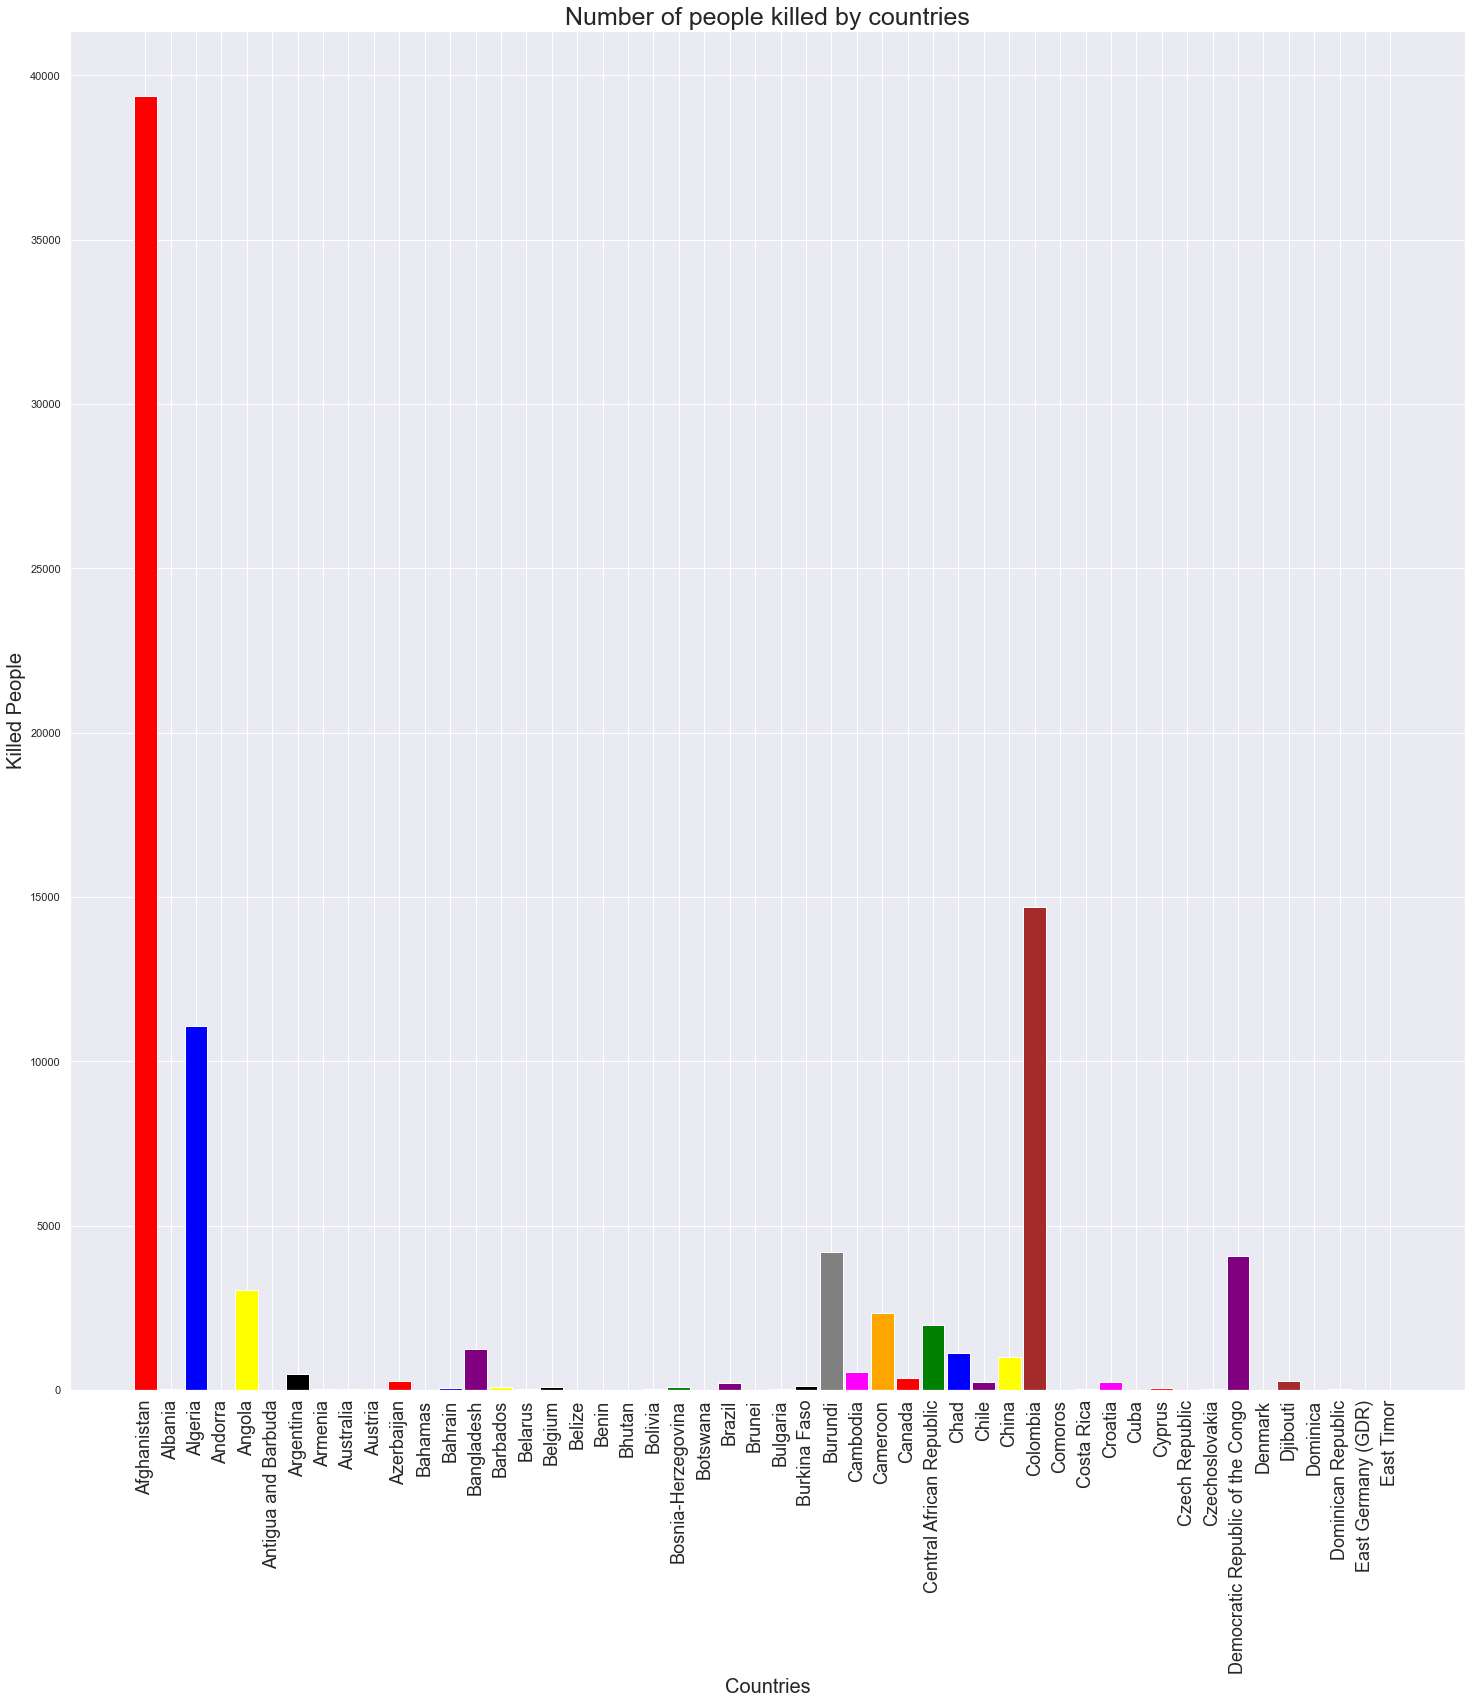

In [31]:
# Bar plot for Number of people killed by countries from 1 to 49

labels = country_Kill_FormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = country_Kill_FormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 25)
# print(fig_size)
plt.show()

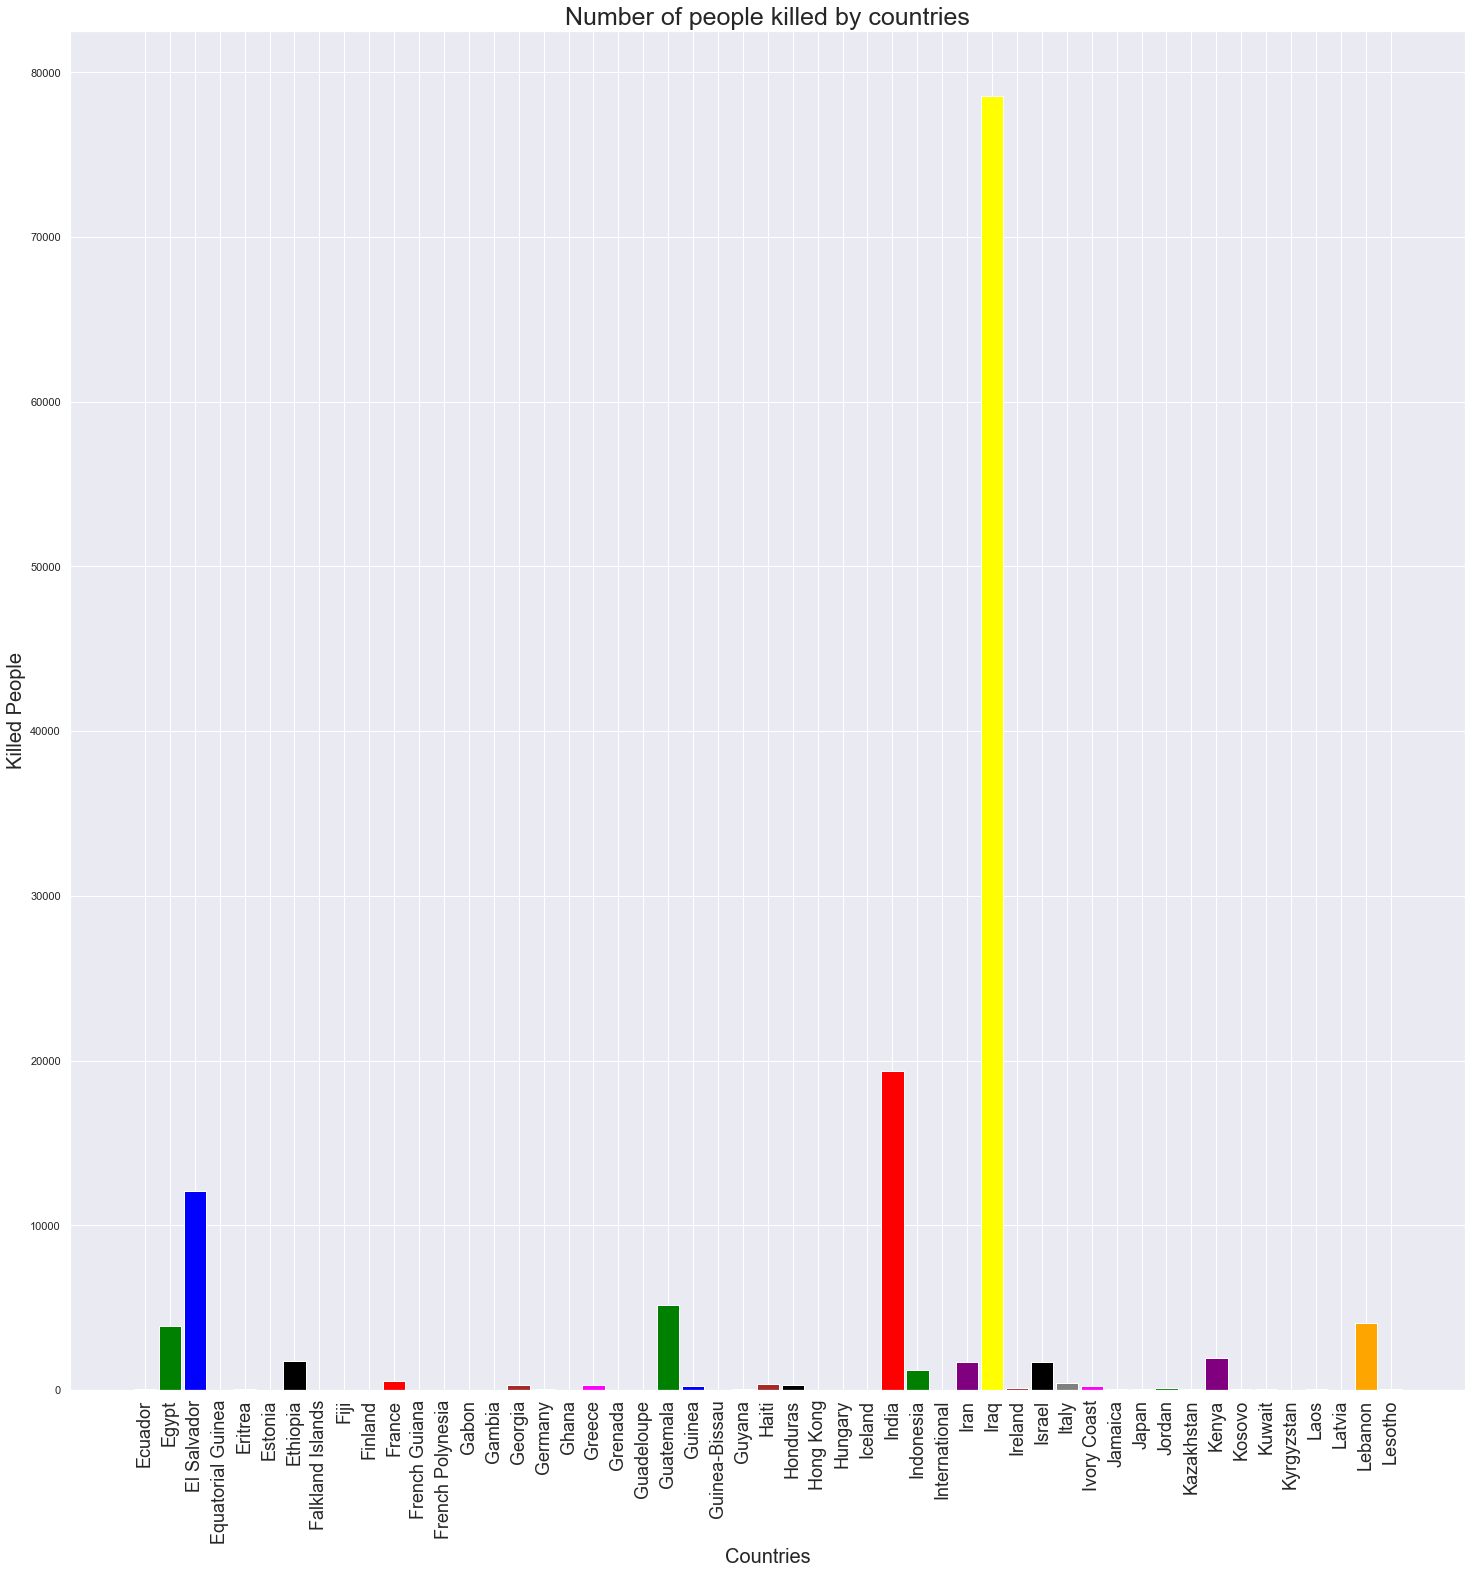

In [32]:
# Bar plot for Number of people killed by countries from 50 to 101

labels = country_Kill_FormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = country_Kill_FormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 25)
plt.show()

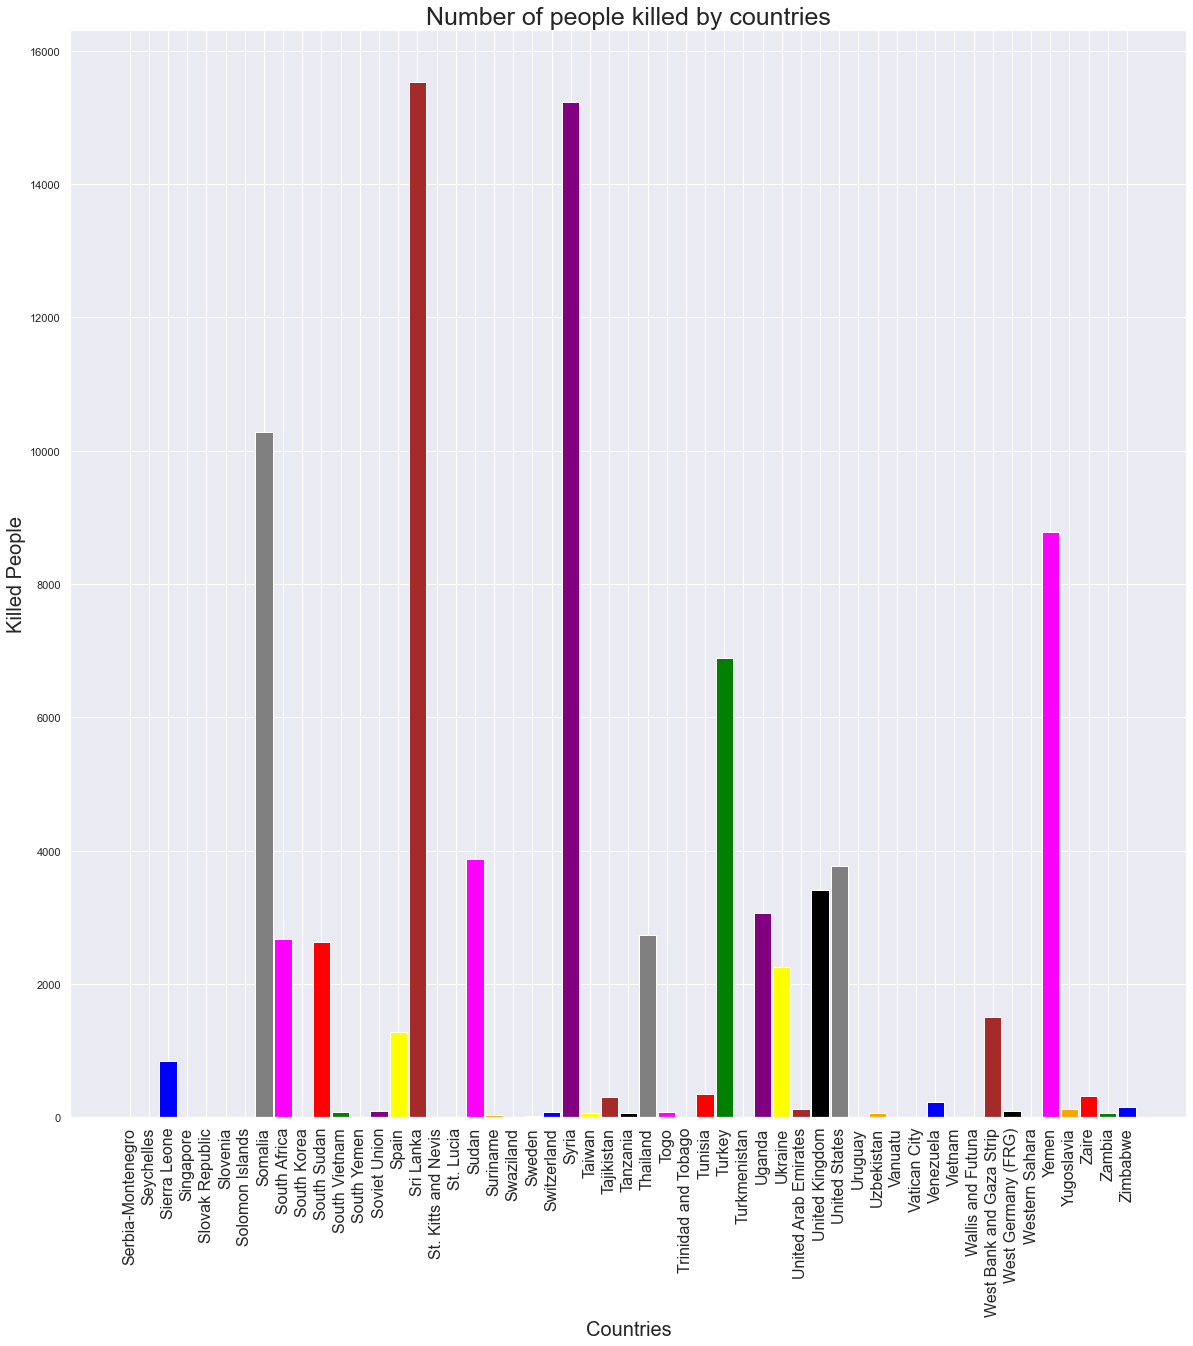

In [33]:
# Bar plot for Number of people killed by countries from 152 to 206

labels = country_Kill_FormatData.columns.tolist()
labels = labels[152:206]
index = np.arange(len(labels))
transpoze = country_Kill_FormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=16, rotation=90)
plt.title('Number of people killed by countries', fontsize = 25)
plt.show()

Observation:

● Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. 

● The Middle East and North Africa are seen to be the places of serious terrorist attacks. 

● Even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. 

● If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. 

● All of these countries are Muslim countries.

## Thank You

### Done by - Aniket Chaware